In [34]:
##Imports##
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# About the Data
I chose to analyze a dataset containing information about the amount of wine, beer, and spirit consumption in 193 different countries.

I found this dataset intriguing because it allows us to validate or refute various hypotheses related to the drinking habits of individual or multiple countries.

My plan is to clean the data thoroughly and employ various methods of feature engineering. By doing so, we aim to extract as much valuable information as possible from this relatively small dataset.


# How it is separated
There are 193 individual rows, representing each of the 193 countries (so there are no repetitions), and there are 6 columns:



*   **country**(representing each country appearing in alphabetical order)

*   **beer_servings**(representing the amount of beer servings in each country)

*   **spirit_servings**(representing the amount of spirit servings in each country, spirit being alcohol drinks such as vodka and whiskey)

*   **wine_servings**(representing the amount of wine servings in each country)

*   **total_litres_of_pure_alcohol**(representing the total amount of alcohol consumed in each country)

*   **continent**(representing the continent of every country)

#Source of the Dataset
If you want to see or search the dataset yourself, here is the [original source](https://gist.github.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1)



# Why is this dataset important?
Although the dataset seems superficial and specific, it can help machine learning models to better learn the drinking habits of countries all over the world, and, with that, predict the outcome of a new country, based, for example, on its geographical location and on its neighbors' behavior.

In [35]:
##Downloading the dataset
import urllib.request

file_url = 'https://gist.githubusercontent.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1/raw/9429430ee053bc796d694ed7e88b333a54f3e287/drinks.csv'
local_filename = 'drinks.csv'

urllib.request.urlretrieve(file_url, local_filename)

('drinks.csv', <http.client.HTTPMessage at 0x7e24ef1de140>)

In [36]:
##Reading the data
Drinks = pd.read_csv("drinks.csv")
Drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [37]:
Drinks.describe()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


##We can already make some assumptions about the data:


1.   There is at least one country that doesn't consume any alcoholic beverages or it is simply not documented in the dataset(Afghanistan, for one)
2.   Analysing the mean we can see countries tend to drink more beer in comparison to spirit and wine, being wine the one with the least servings

# Finding Correlations between variables in our Data

Correlations are an interesting way to show the impact of a certain variable in an outcome, for example, we can, looking at the correlations, find the variable that impacts total_litres_of_alcohol the most, alas, the most popular beverage in the world.

0.458818874139382
0.5271716935065208
0.8358386279352711


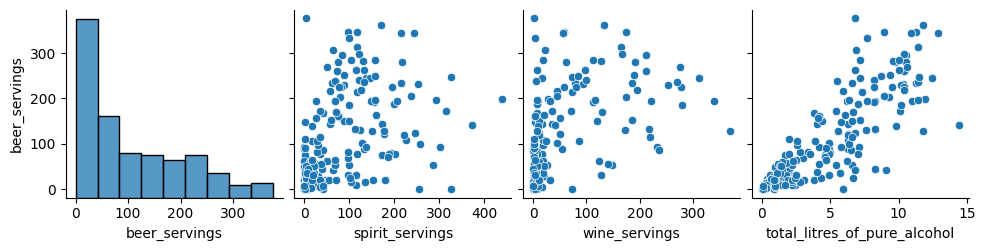

In [38]:
##Correlation between variables with beer_servings
drinks_num = Drinks.select_dtypes(include = ['float64', 'int64'])
drinks_num_corr = drinks_num.corr()['beer_servings'][:]
drinks_num_corr = drinks_num_corr.drop('beer_servings')
for x in drinks_num_corr:
  print(x)
for x in range(0, len(drinks_num.columns), 5):
  sns.pairplot(data=drinks_num,
                x_vars=drinks_num.columns[x:x+5],
                y_vars=['beer_servings'])
##Conclusions: total_litres_of_pure_alcohol is strongly correlated with beer_servings


0.458818874139382
0.19479704700984554
0.6549681750838597


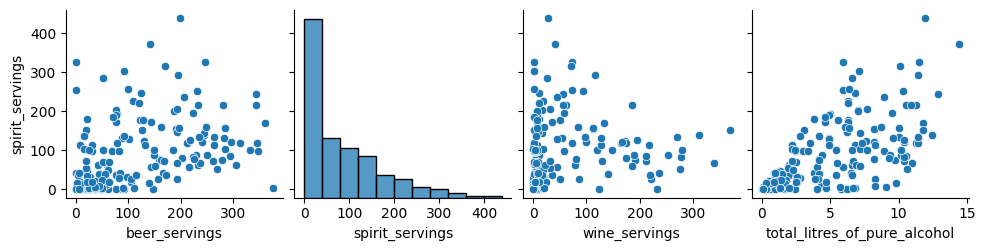

In [39]:
##Correlation between variables with spirit_servings
drinks_num = Drinks.select_dtypes(include = ['float64', 'int64'])
drinks_num_corr = drinks_num.corr()['spirit_servings'][:]
drinks_num_corr = drinks_num_corr.drop('spirit_servings')
for x in drinks_num_corr:
  print(x)
for x in range(0, len(drinks_num.columns), 5):
  sns.pairplot(data=drinks_num,
                x_vars=drinks_num.columns[x:x+5],
                y_vars=['spirit_servings'])
##Conclusions: No variable is very correlated with spirit_servings

0.5271716935065208
0.19479704700984554
0.6675983418034838


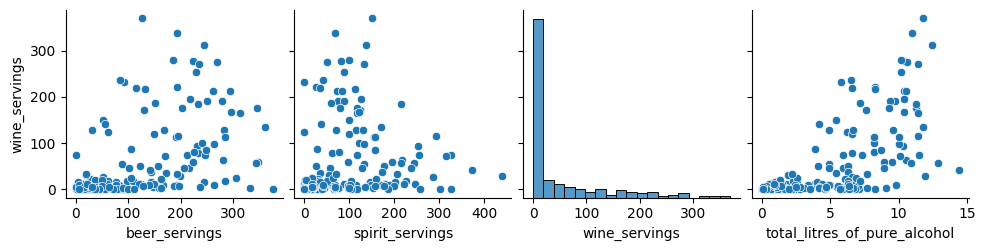

In [40]:
##Correlation between variables with wine_servings
drinks_num = Drinks.select_dtypes(include = ['float64', 'int64'])
drinks_num_corr = drinks_num.corr()['wine_servings'][:]
drinks_num_corr = drinks_num_corr.drop('wine_servings')
for x in drinks_num_corr:
  print(x)
for x in range(0, len(drinks_num.columns), 5):

  sns.pairplot(data=drinks_num,
                x_vars=drinks_num.columns[x:x+5],
                y_vars=['wine_servings'])

##Conclusions: No variable is very correlated with wine_servings

# What can we conclude by the correlation results?

We can conclude that beer, as it has a high correlation value with total_litres_of_pure_alcohol, is the most popular beverage drank in the 193 countries of our dataset.

# Checking for Normal Distributed Data
It is important to check whether our data is normally distributed because it aids our machine learning models in understanding the underlying patterns in the data. Additionally, it ensures the validity of the statistical techniques and models used in the dataset.

A normally distributed dataset is characterized by the majority of values being concentrated in the middle area of the graph, resulting in a symmetrical bell curve shape. This distinctive form is a key feature of normal distribution.

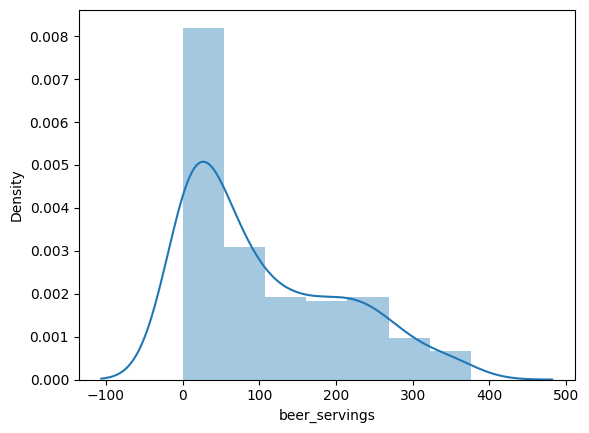

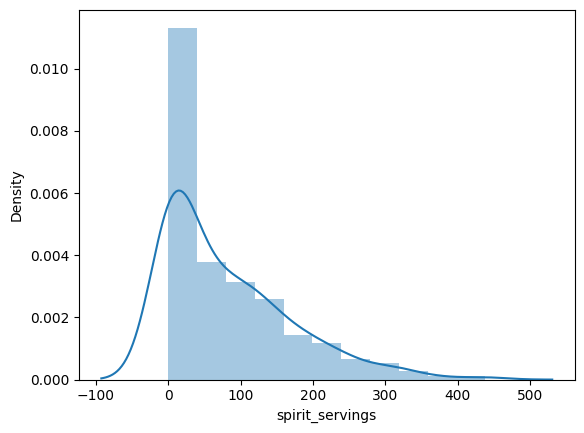

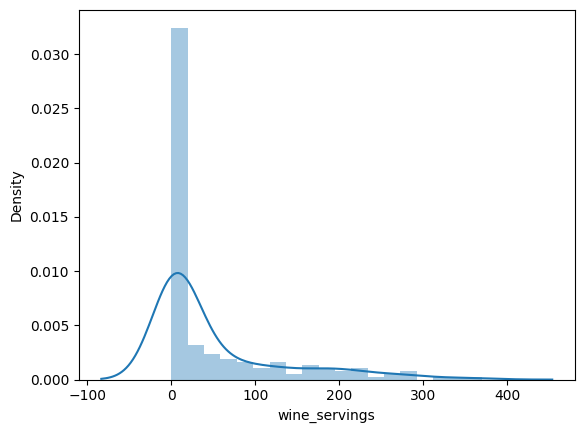

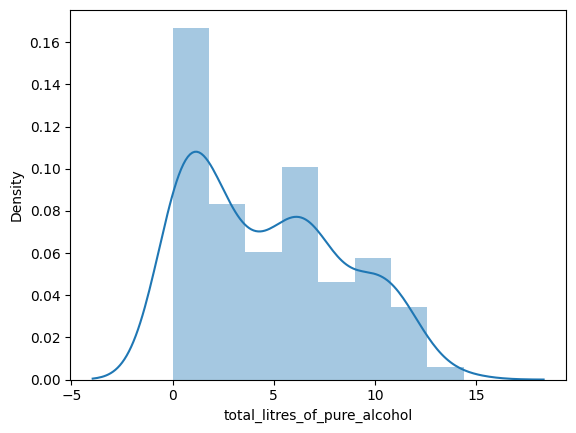

Skewness of beer_servings: 0.82
Skewness of spirit_servings: 1.29
Skewness of wine_servings: 1.91
Skewness of total_litres_of_pure_alcohol: 0.43


In [41]:
##Let's check if our data is normally distributed using the skew function

for column in Drinks.columns:
  if column == "country" or column == "continent":
    continue
  plt.figure()
  sns.distplot(Drinks[column])
  plt.show()

for column in Drinks.columns:
  if column == "country" or column == "continent":
    continue
  print("Skewness of {}: {:.2f}".format(column, Drinks[column].skew()))






# Conclusions

We can conclude that:


*   beer_servings: slightly skewed
*   spirit_servings: highly skewed
*   wine_servings: highly skewed
*   total_litres_of_pure_alcohol: nearly simetrical

As so, the data would need to be normalized, we can try a few methods learned through this course, mainly log and sqrt transformations


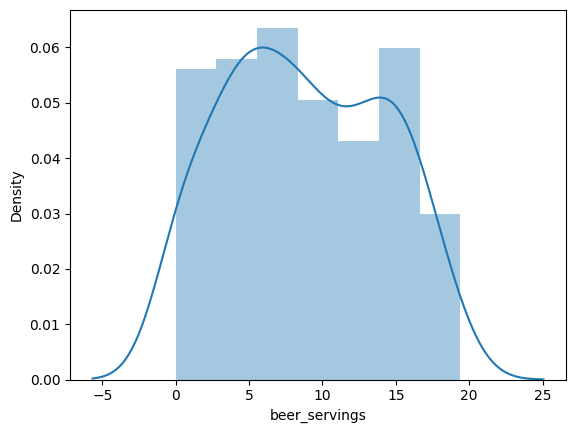

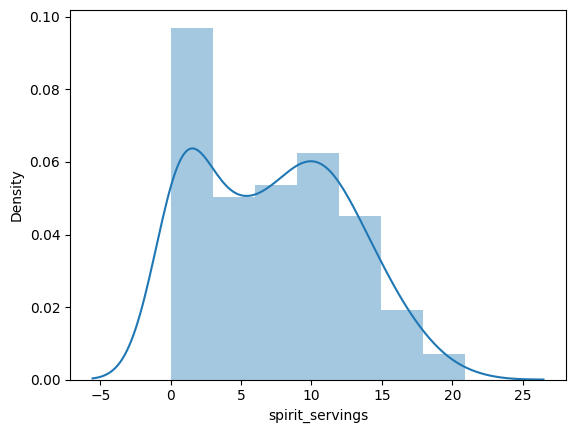

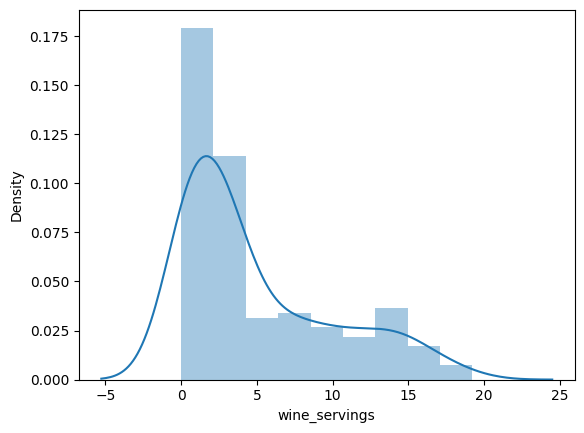

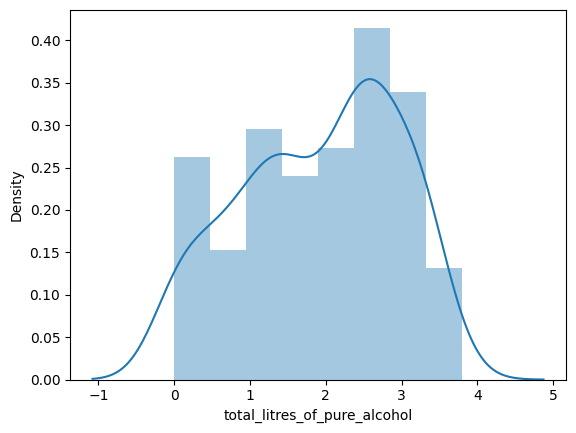

Skewness of beer_servings: 0.08
Skewness of spirit_servings: 0.24
Skewness of wine_servings: 1.07
Skewness of total_litres_of_pure_alcohol: -0.29


In [42]:
#I will use the sqrt function for the pure sake of testing this function
Skewness = []
for column in Drinks.columns:
  if column == "country" or column == "continent":
    continue

  sqrt_transformed_column = np.sqrt(Drinks[column])
  Skewness.append( sqrt_transformed_column.skew())
  plt.figure()
  sns.distplot(sqrt_transformed_column)
  plt.show()
x= 0
for column in Drinks.columns:
    if column == "country" or column == "continent":
      continue
    print("Skewness of {}: {:.2f}".format(column, Skewness[x]))
    x+=1

#As we can see the sqrt transformation balanced the data a little, but it still is highly imbalanced on wine_servings



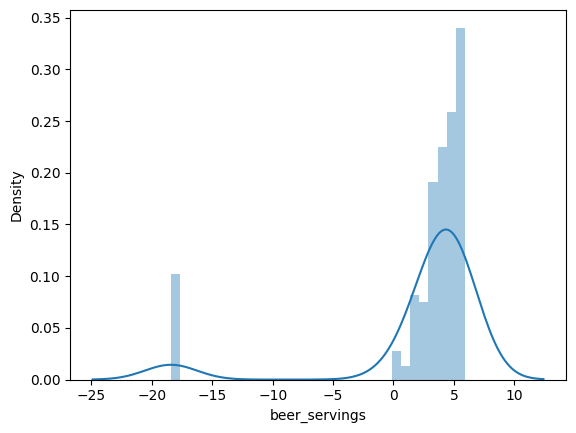

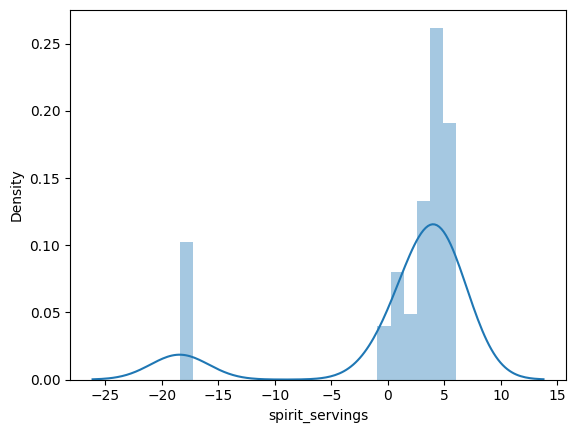

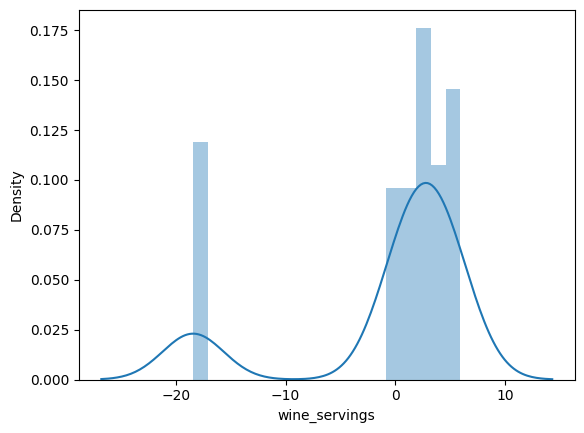

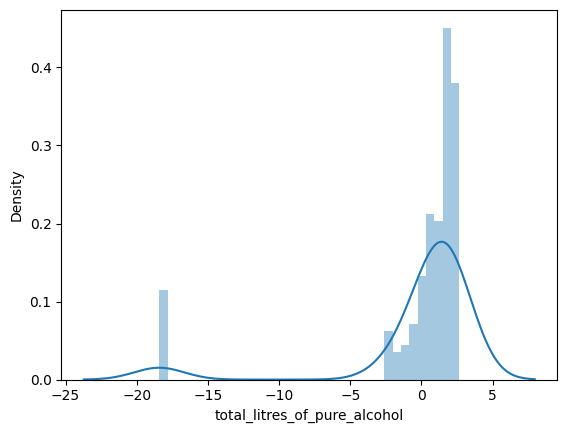

Skewness of beer_servings: -2.94
Skewness of spirit_servings: -2.18
Skewness of wine_servings: -1.68
Skewness of total_litres_of_pure_alcohol: -3.17


In [43]:
#Let's see now the log transformation
Skewness = []
for column in Drinks.columns:
  if column == "country" or column == "continent":
    continue

  log_transformed_column = np.log(Drinks[column]+1e-8)
  Skewness.append( log_transformed_column.skew())
  plt.figure()
  sns.distplot(log_transformed_column)
  plt.show()
x= 0
for column in Drinks.columns:
    if column == "country" or column == "continent":
      continue
    print("Skewness of {}: {:.2f}".format(column, Skewness[x]))
    x+=1

#As we can see this transformation did very poorly, turning our data more umbalanced

# Conclusions
We can see that the sqrt transformation worked well on our data, making 3 out of 4 variables normalized. It did, however, poorly on wine_servings, as it still has a highly skewed value.

The log function, on the other hand, didn't work for our case in any variable, turning our data even more unbalanced.

# Checking for Null values or Outliers

It is also important to check if our data has any null values or outliers, as it is essential it doesn't because our machine learning models require a clean data to work with

In [59]:
Drinks.isnull().sum()


country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       22
total_servings                   0
dtype: int64


As we can observe, there are no null values in the dataset, except for the **continent** feature in 22 countries. These countries lack an official association with any continent, resulting in NaN values.

Since we cannot feasibly assign these countries to specific continents, there is no straightforward method to fill these NaN values. However, for the current analysis, as we are not utilizing the continent values, removing them may not be necessary.

Nevertheless, it is essential to be mindful of these NaN values for any future works with this dataset. Depending on the specific analysis or model, leaving these NaN values unaddressed could potentially have negative implications on the learning process. Hence, for further analyses that might involve the continent feature, it might be prudent to remove these missing values to avoid any adverse impact on the model's performance and accuracy.

In [60]:
#We may want to scale our data, even thought the values aren't drastically distinct from each other
Drinks_Norm =pd.DataFrame(MinMaxScaler().fit_transform(Drinks[['beer_servings','spirit_servings','wine_servings',	'total_litres_of_pure_alcohol']]))
Drinks_Norm.head()

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,0.236702,0.404908,0.192857,0.379845
2,0.066489,0.000000,0.050000,0.054264
3,0.577128,0.174847,0.160714,0.457364
4,0.271277,0.392638,0.160714,0.379845


<Figure size 640x480 with 0 Axes>

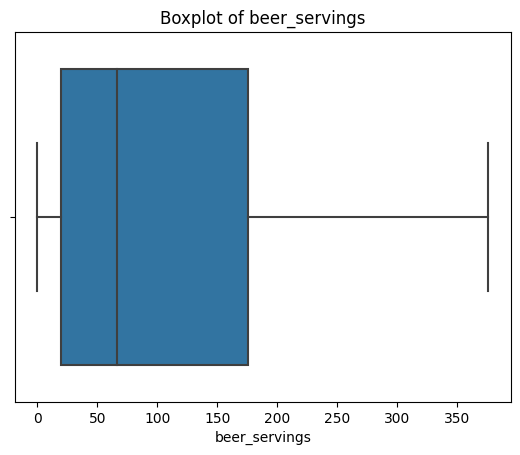

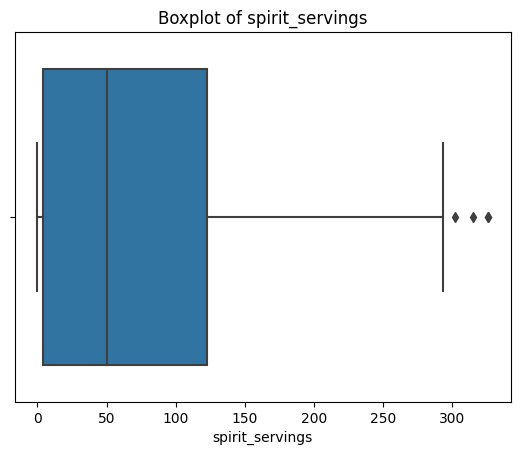

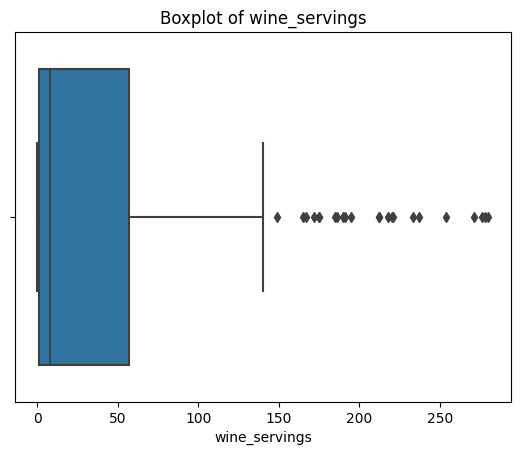

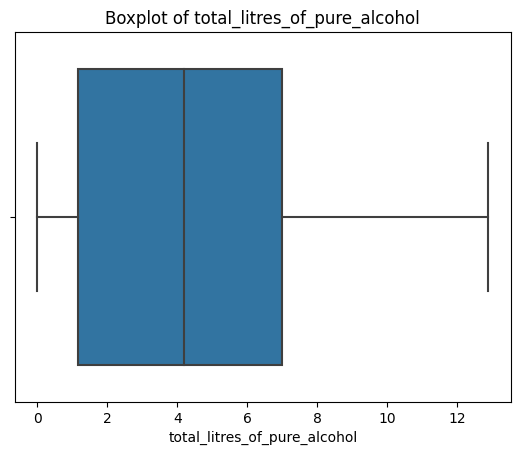

<Figure size 640x480 with 0 Axes>

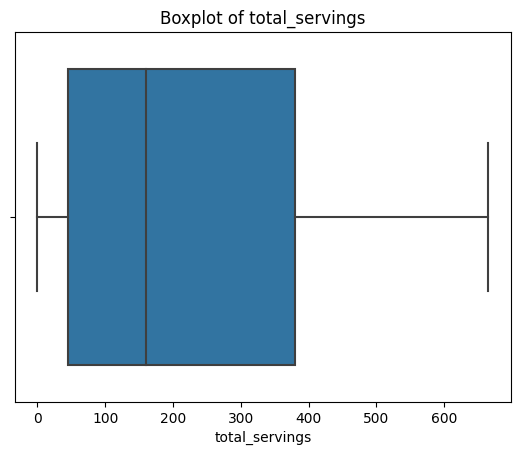

In [61]:
#Now let's boxplot our variables:

for column in Drinks.columns:
  plt.figure()

  if column == 'country' or column == 'continent':
    continue
  sns.boxplot(x=Drinks[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


We can see our data has a few outliers seeing the Boxplot of spirit_servings, we can remove the two most distant outliers as to clean our data
We can also see that our data has a lot outliers on wine_servings, as there is a lot of them, we will prioritize removing only the most distant ones in this case the last 3
The indexes to be removed are as follows:

<Figure size 640x480 with 0 Axes>

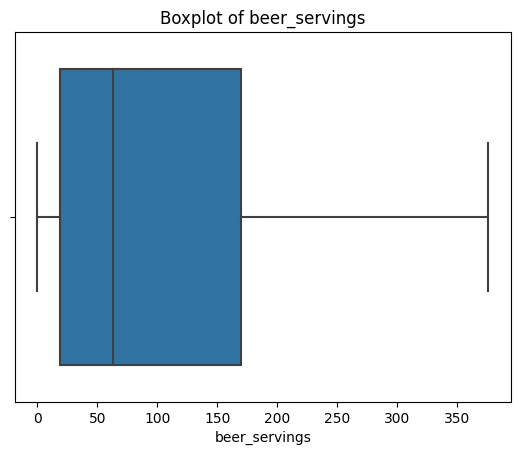

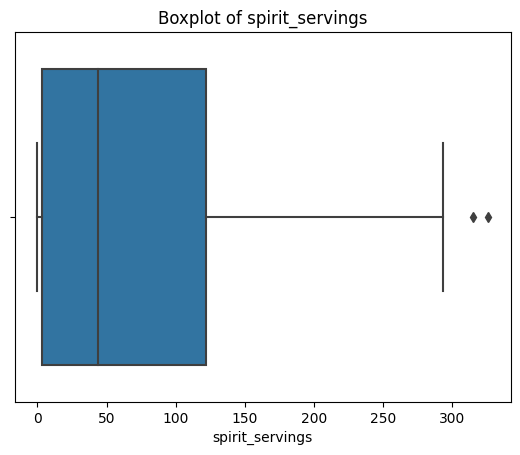

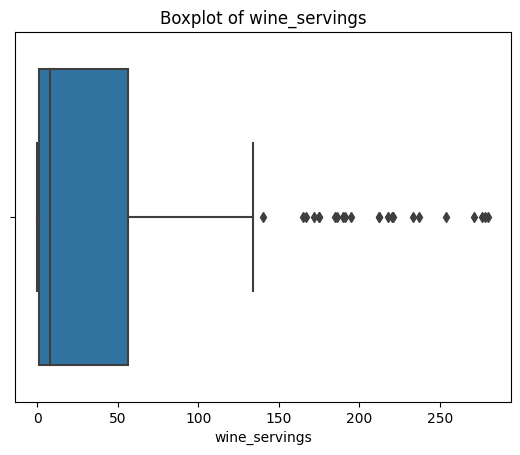

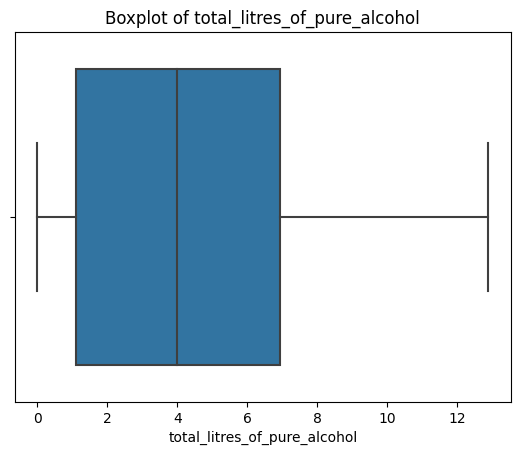

<Figure size 640x480 with 0 Axes>

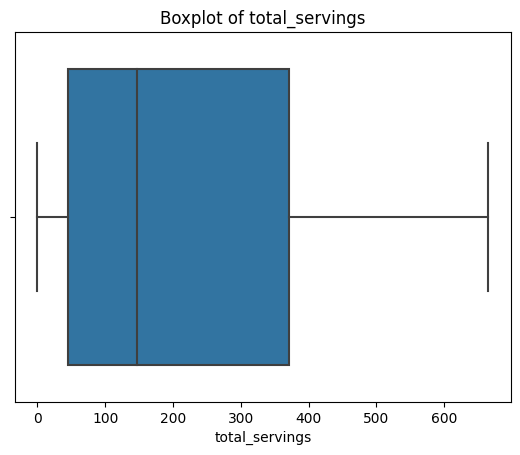

In [62]:

Drinks = Drinks.drop(Drinks.index[[3,15,61,68,136]])
for column in Drinks.columns:
  plt.figure()

  if column == 'country' or column== "continent":
    continue
  sns.boxplot(x=Drinks[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

#We can add another column for clarification, called "total_servings"


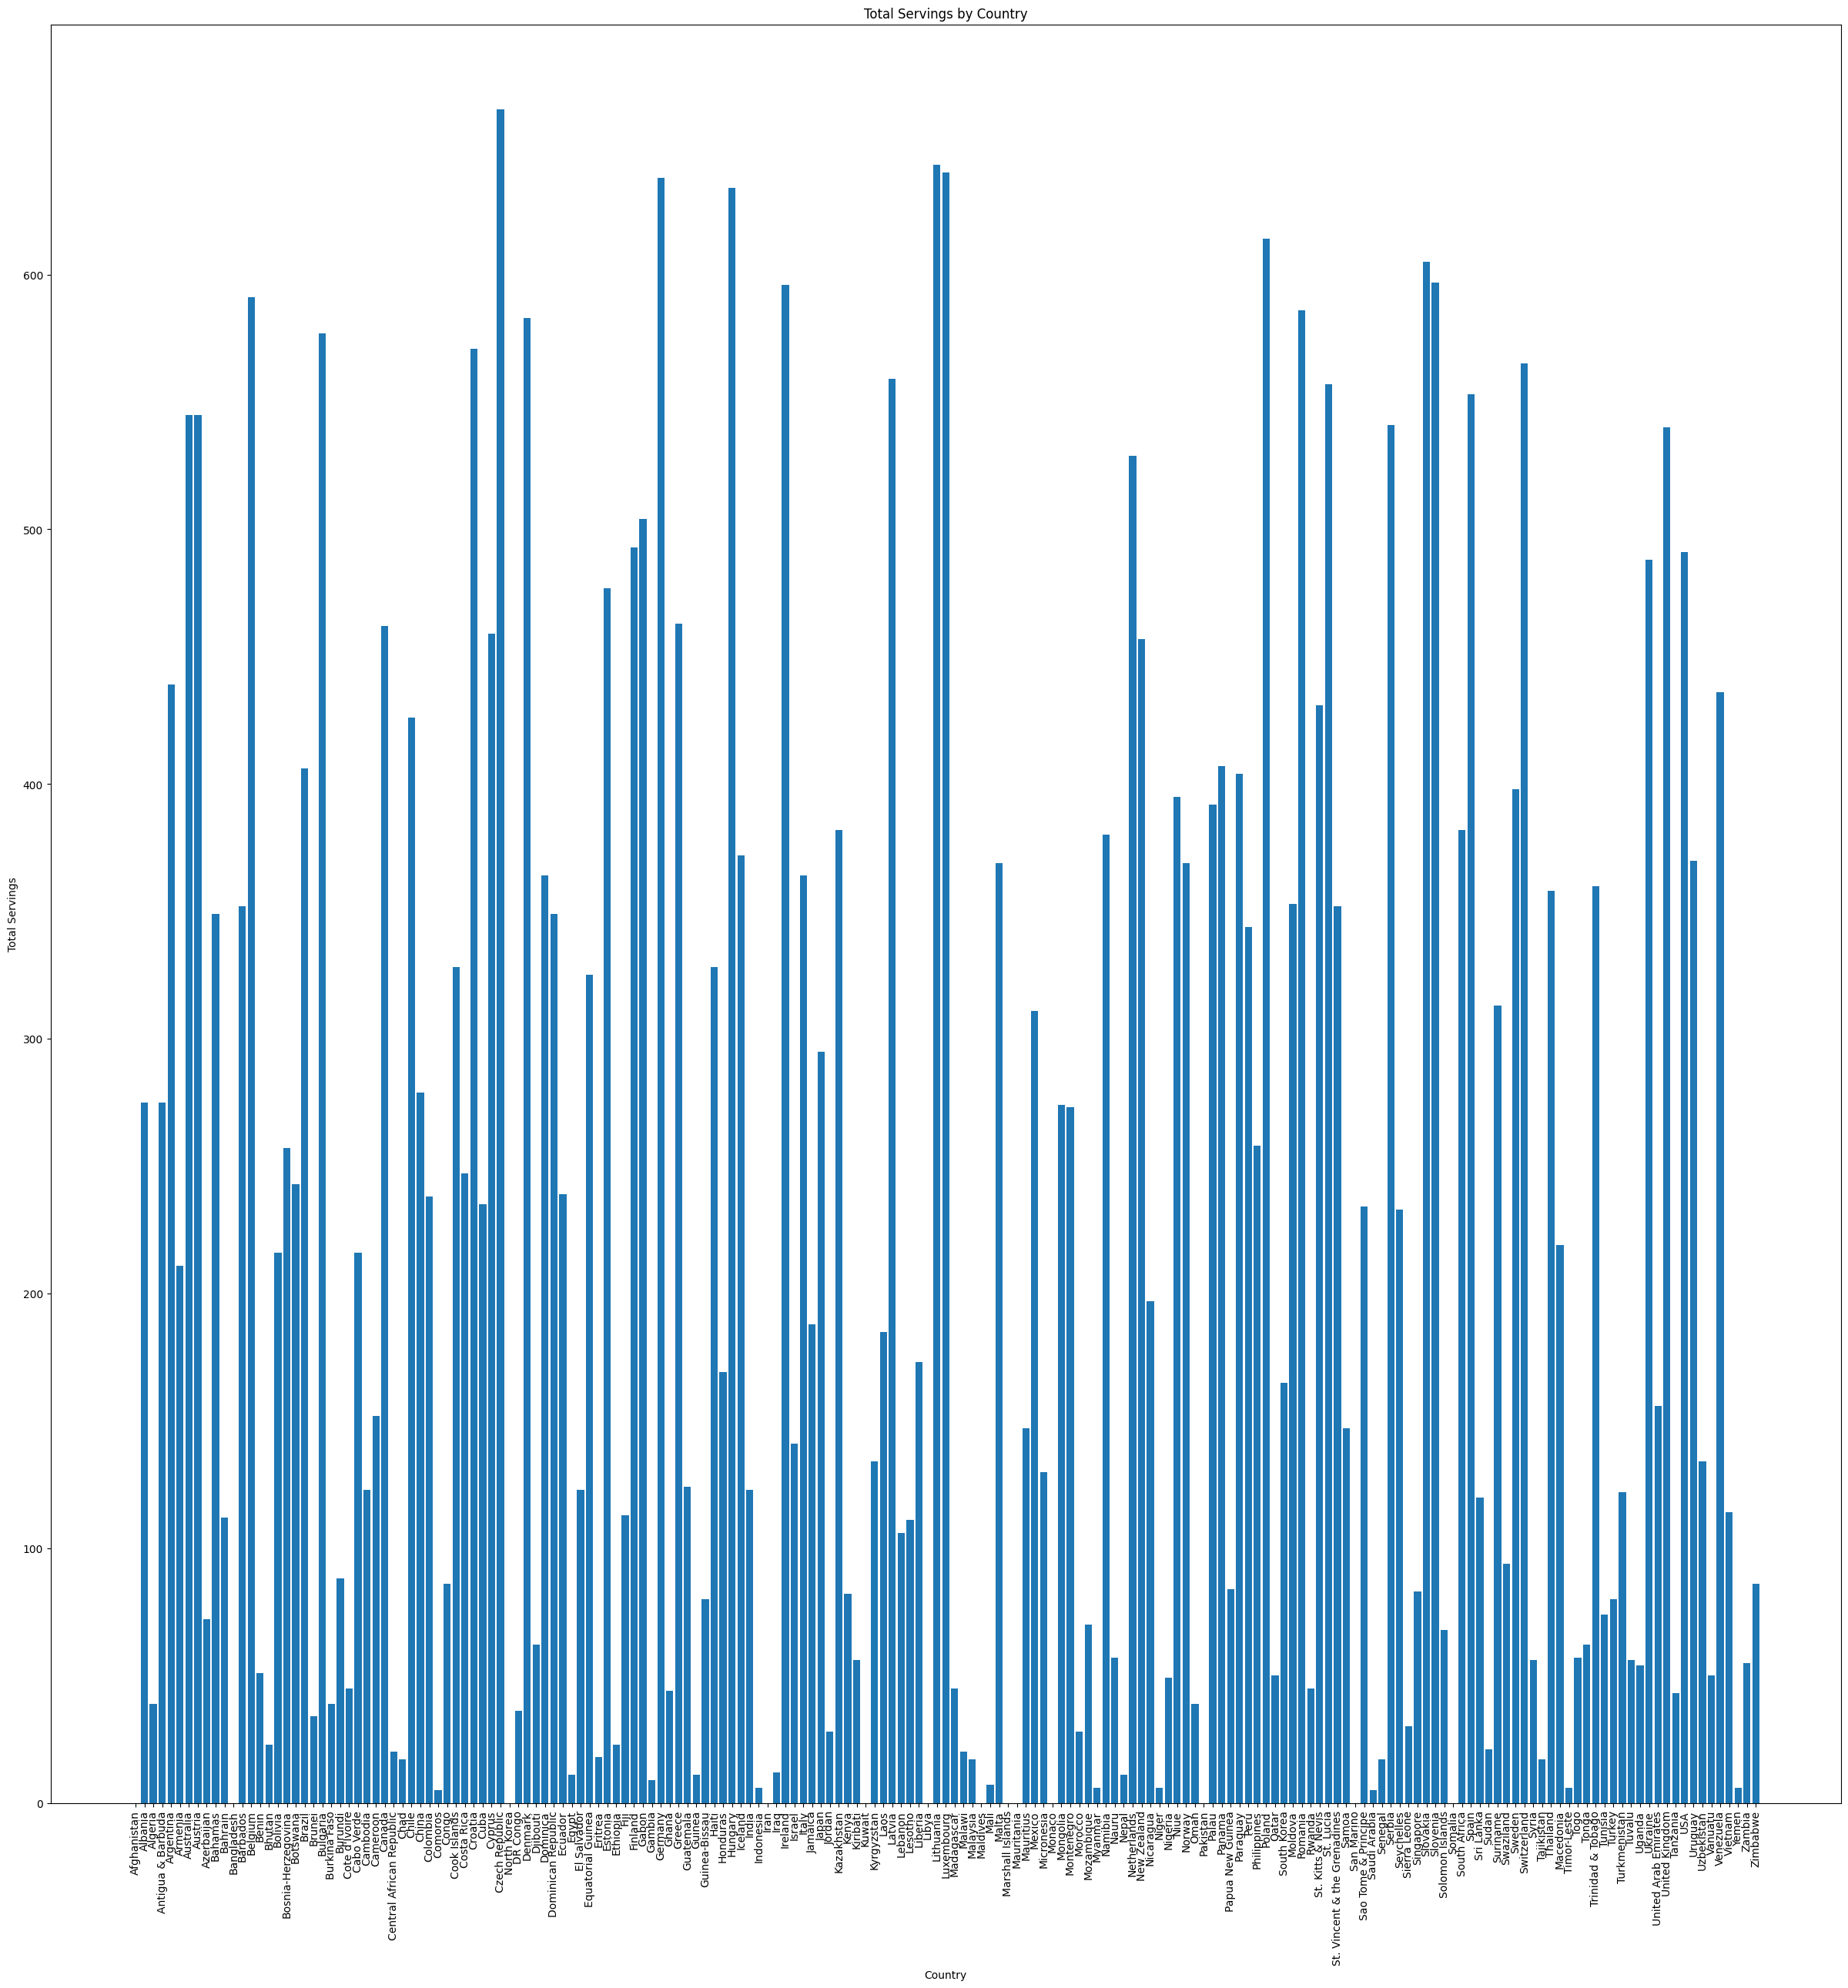

In [63]:

Drinks['total_servings'] = Drinks['wine_servings'] + Drinks['beer_servings']+Drinks['spirit_servings']
#We will now show a barplot of all the total_servings of each country

Drinks.head()
plt.figure(figsize=(30,30))  # Adjust the figure size as needed

plt.bar(Drinks['country'], Drinks['total_servings'])

plt.xticks(rotation=90)

plt.xlabel('Country')
plt.ylabel('Total Servings')
plt.title('Total Servings by Country')

plt.show()

#An interesting analysis we can conduct with the new variable total_servings is to analyze the top 10 countries that consume the most alcohol. By examining the data, we can identify and explore the ten countries with the highest alcohol consumption levels.

<BarContainer object of 10 artists>

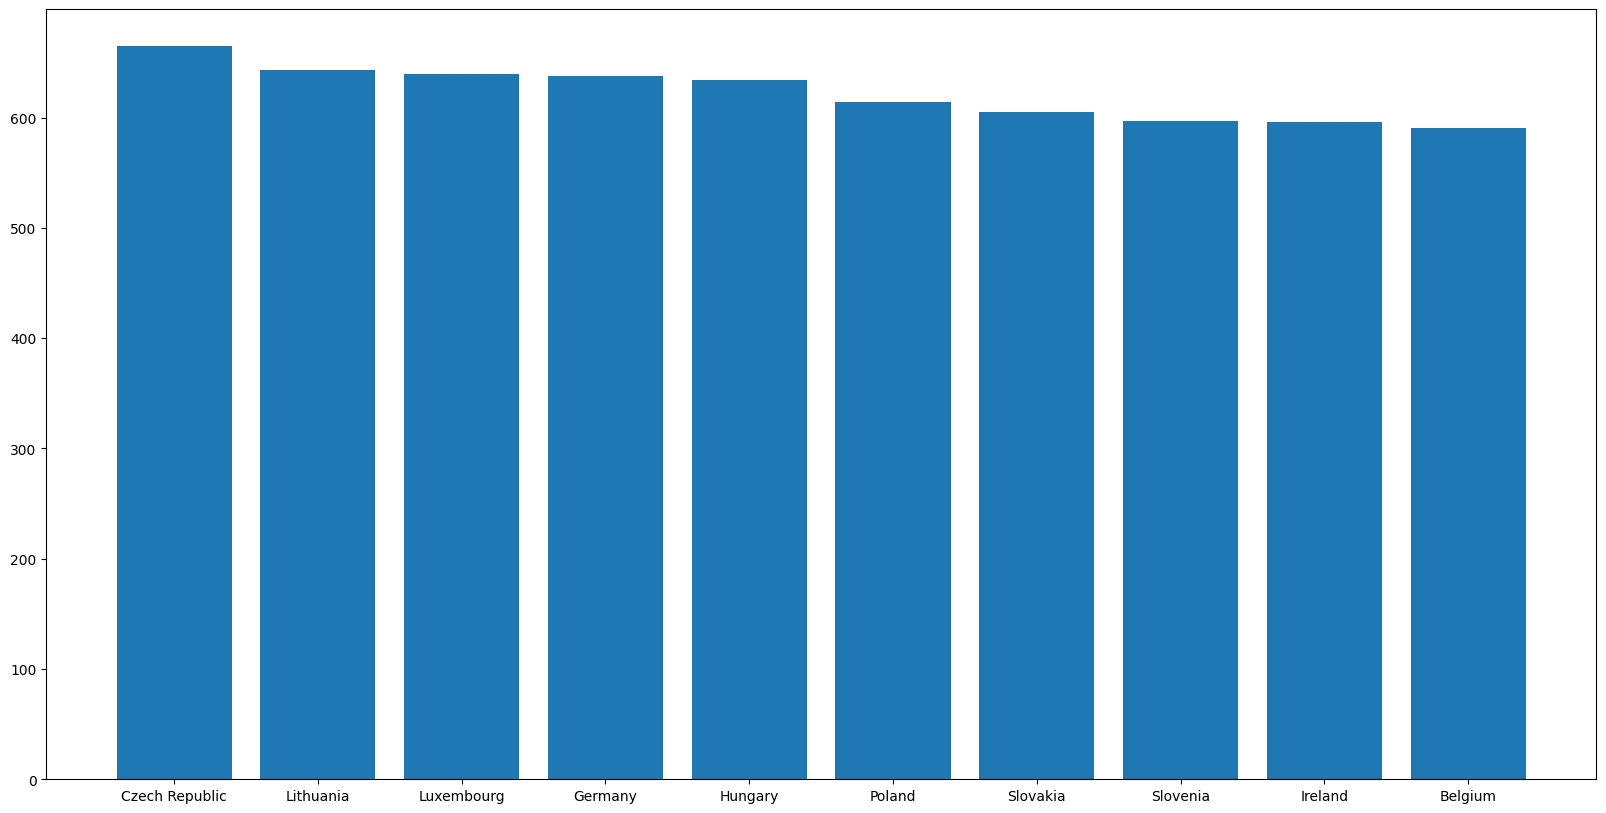

In [65]:


plt.figure(figsize=(20,10)) # Adjust the figure size as needed

top_10_drinkers = Drinks.nlargest(10, 'total_servings')[['country', 'total_servings']]
plt.bar(top_10_drinkers['country'], top_10_drinkers['total_servings'])
#We can see that, while they are diverse, the total ammount of servings are really similar, over 600

##Let's see, in this case, which variable is more correlated with total_servings

In [66]:

highest = 0
highest_col = ""
for column in Drinks.columns:
  if column == "country" or column == "total_servings" or column == "continent":
    continue
  correlation = Drinks['total_servings'].corr(Drinks[column])
  if highest <  correlation:
    highest = correlation
    highest_col = column
  print(column + " correlation:" + str(correlation))
print("Highest_Correlation: "+str(highest) + "("+str(highest_col)+")")



beer_servings correlation:0.8961201429983181
spirit_servings correlation:0.7175900235002413
wine_servings correlation:0.7355003948044985
total_litres_of_pure_alcohol correlation:0.9281682345159191
Highest_Correlation: 0.9281682345159191(total_litres_of_pure_alcohol)


Here we see that beer_servings is strongly correlated with total_servings, but total_litres_of_pure_alcohol is more, which, in a way, makes sense, considering the more liters of alcohol there is the more servings there are

##Result: beer is the most consumed beverage (considering the dataset and countries presented)

##Now let's formulate some hypothesis:

1- Countries that start with letters A to M drink more wine(sum of wine_servings) than those who start with letter M to Z

2-Countries on the Occident tend to drink move beer than the ones on the Orient

3- Countries from Europe drink more spirit beverages than the countries from America


I will choose to conduct  a formal significance test for the first hypothesis


**Ho(Null Hypothesis)**: Countries that start with letters A to M don't drink more wine than those who start with letter M to Z(μ1−μ2=0)
  

**Ha(Alternative Hypothesis)**: Countries that start with letters A to M drink more wine than those who start with letter M to Z(μ1−μ2>0)

<Axes: xlabel='wine_servings', ylabel='Density'>

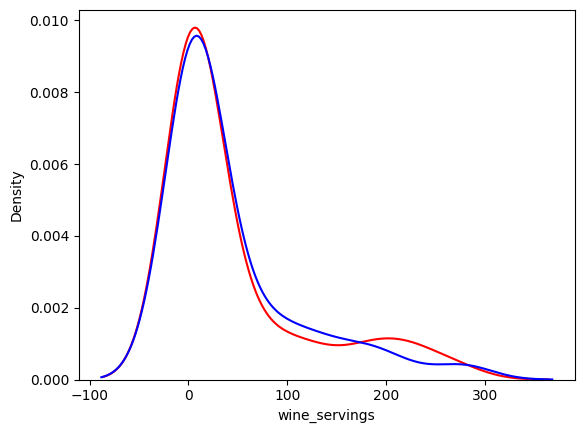

In [67]:
##As the dataset separates countries in alphabetical order, it's simple to split our data
##we just need to see the index of the last country that starts with M(113)
Drinks_AM = Drinks.iloc[0:113]
Drinks_MZ = Drinks.iloc[113:]
sns.distplot(Drinks_AM['wine_servings'],color='red',hist=False)
sns.distplot(Drinks_MZ['wine_servings'],color='blue',hist=False)

##We can see the results are really similar just by looking at the graph


In [68]:
##Let's choose a 5% significance level

alpha=0.05
t_value, p_value = stats.ttest_ind(Drinks_AM['wine_servings'], Drinks_MZ['wine_servings'])
print("t_value:",t_value)
print("p_value:", p_value)




t_value: 0.19542116847851287
p_value: 0.8452824490824411


#We see that the value of p is much higher than alpha, therefore we can't reject Ho
#Conclusion: We can't say that countries that start with letters A to M drink more wine than those who start with letter M to Z




## Additional Data:
Since we are unable to collect more data, a valuable suggestion to gain deeper insights into the alcohol-consuming behavior of various countries is to expand the analysis by considering more specific subcategories of alcoholic beverages.

For instance, rather than solely analyzing overall spirit servings, we could delve into subcategories like vodka servings or other specific types of spirits. By doing so, we can gain a more nuanced understanding of the consumption patterns for different types of spirits in different regions.

Similarly, breaking down the other variables, such as wine and beer, into more specific types like red, white, rosé, lager, ale, and hybrid varieties can provide us with more comprehensive insights into the preferences and drinking habits of each country.

Expanding the analysis to include these subcategories allows us to explore the diversity of alcohol consumption across various countries and potentially uncover interesting trends and patterns that may not be apparent when looking at the overall alcohol consumption alone.


#Further exploration of the data
Even in a small dataset like this, numerous unexplored aspects exist, which were not mentioned or addressed in this project. For instance, the two hypotheses introduced earlier remained unproven.

Regarding data normalization, there are several methods that could be applied to all variables. However, in this project, we only considered the log and sqrt transformations during our analysis. To gain a more comprehensive understanding of the data, further exploration of additional normalization techniques could be beneficial.